An object of class Seurat 
25660 features across 47620 samples within 1 assay 
Active assay: RNA (25660 features, 0 variable features)

Centering and scaling data matrix

PC_ 1 
Positive:  TNNT2, TTN, TNNI1, AC020909.2, MYH6, ACTC1, ENO3, NEBL, MYL4, EMC10 
	   TPM1, FILIP1, TNNC1, MYL7, SMPX, HSPB7, PDLIM5, NEXN, PLN, ACTN2 
	   MYL3, SLC25A4, NKX2-5, MYBPC3, SVIL, NEAT1, CRIP2, SNTA1, MEF2C, ATP1B1 
Negative:  PTMA, ACTG1, SET, HMGB1, POU5F1, TKT, H2AFZ, TUBB2B, L1TD1, AC106864.1 
	   NASP, TMSB4X, CRABP1, MARCKS, LIN28A, SFRP2, TUBA1B, NCL, MCM7, ZIC2 
	   ACTB, CKS1B, TUBA1C, FABP5, SEPHS1, PCLAF, DPPA4, HELLS, TNNT1, HNRNPAB 
PC_ 2 
Positive:  VIM, FAM89A, PRTG, IRX3, PDGFRA, MDK, CDH11, LIX1, TMEM88, SEPT11 
	   MEIS1, CRNDE, FTL, ANXA2, APOC1, COLEC12, KRT19, S100A11, COL2A1, PDLIM7 
	   EMP2, TMEM97, PCOLCE, ARHGAP29, PRRX2, FOXC2, COL1A1, SPARC, CRABP2, ODC1 
Negative:  FAM162A, PGK1, FOXD3-AS1, SLC2A1, EPCAM, LINC00678, CD9, UGP2, AC009446.1, SOX2 
	   CLDN7, SNHG25, VSNL1, GRID2, BNIP3, LDHA, SFRP2, TDGF1, SEPHS1, POU5F1 
	   PHC1, SMIM3, RARRES2, USP44, AC092490.1, MAL2, AL117378.1, TRIML2, ETV4, ESRP1 
PC_

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>
D0_AAACCCAAGAGTTCGG-1,D0_R1,21919,4613,3.722798,1,1
D0_AAACCCAAGGTCATTC-1,D0_R1,31778,6074,4.767449,4,4
D0_AAACCCAAGTTAGTGA-1,D0_R1,25091,4821,11.163365,1,1
D0_AAACCCACAAGATGTA-1,D0_R1,22547,4917,4.816605,4,4
D0_AAACCCACAGAGTAAT-1,D0_R1,36628,6156,11.657748,3,3
D0_AAACCCACAGCAGTCC-1,D0_R1,26341,5408,11.639649,2,2


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47620
Number of edges: 1719964

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9346
Number of communities: 17
Elapsed time: 12 seconds


10:01:29 UMAP embedding parameters a = 0.9922 b = 1.112

10:01:29 Read 47620 rows and found 42 numeric columns

10:01:29 Using Annoy for neighbor search, n_neighbors = 30

10:01:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:01:37 Writing NN index file to temp file /tmp/RtmpidsC1A/file5f6527b7e19

10:01:37 Searching Annoy index using 1 thread, search_k = 3000

10:01:55 Annoy recall = 100%

10:01:56 Commencing smooth kNN distance calibration using 1 thread

10:01:58 Initializing from normalized Laplacian + noise

10:02:06 Commencing optimization for 200 epochs, with 2027944 positive edges

10:02:28 Optimization finished



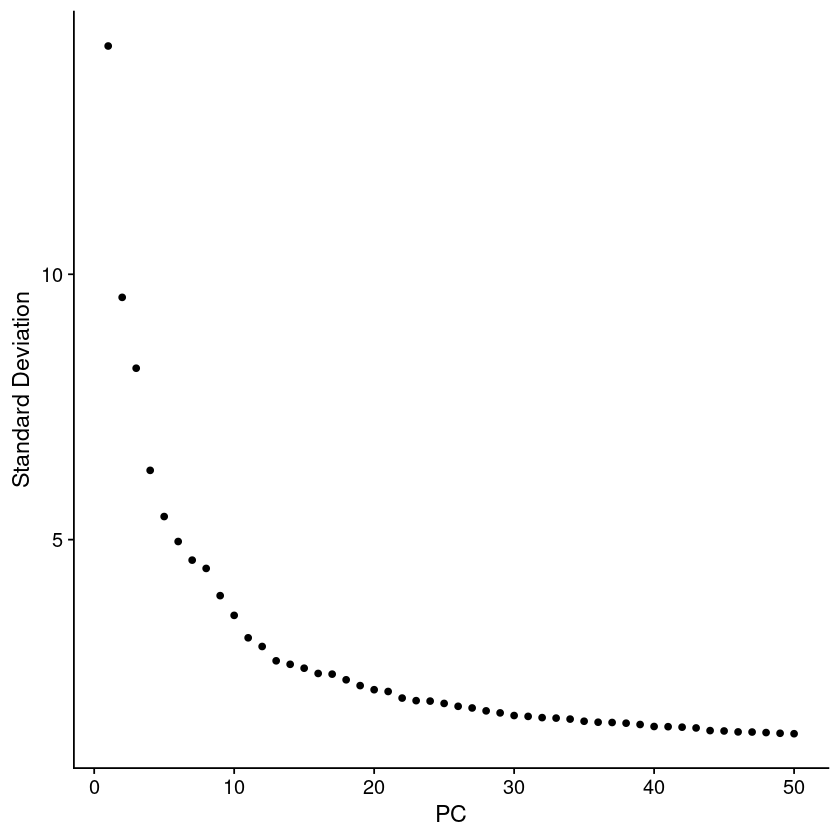

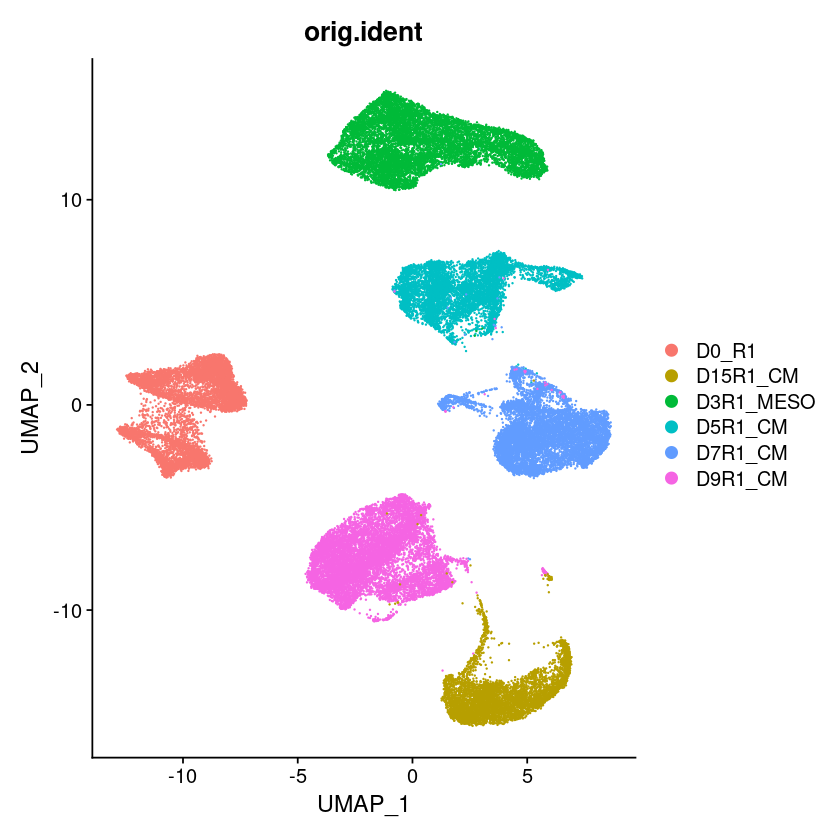

In [3]:
library(dplyr)
library(Seurat)
library(patchwork)

# List of Objects
D0_R1 <- readRDS("/volume/DAY_0/D0_R1/D0_R1_final.rds")
D3R1_MESO <- readRDS("/volume/DAY_0/D3R1_MESO/D3R1_MESO_final.rds")
D5R1_CM <- readRDS("/volume/DAY_0/D5R1_CM/D5R1_CM_final.rds")
D7R1_CM <- readRDS("/volume/DAY_0/D7R1_CM/D7R1_CM_final.rds")
D9R1_CM <- readRDS("/volume/DAY_0/D9R1_CM/D9R1_CM_final.rds")
D15R1_CM <- readRDS("/volume/DAY_0/D15R1_CM/D15R1_CM_final.rds")

# MERGE
R1_MERGED <- merge(D0_R1, y = c(D5R1_CM, D3R1_MESO, D7R1_CM, D9R1_CM, D15R1_CM), add.cell.ids = c("D0", "D3", "D5", "D7", "D9", "D15"), project = "R1_MERGED")
R1_MERGED

# Normalize
R1_MERGED <- NormalizeData(R1_MERGED)

# SCALE & PCA 
all.genes <- rownames(R1_MERGED)
R1_MERGED <- ScaleData(R1_MERGED, features = all.genes)

R1_MERGED <- FindVariableFeatures(R1_MERGED, selection.method = "vst", nfeatures = 2000)
R1_MERGED <- RunPCA(R1_MERGED, features = VariableFeatures(object = R1_MERGED))

# ELBOWPLOT
ElbowPlot(R1_MERGED, ndims = 50)

# METADATA TABLE
head(R1_MERGED@meta.data)

# UMAP
R1_MERGED <- FindNeighbors(R1_MERGED, dims = 1:42)
R1_MERGED <- FindClusters(R1_MERGED, resolution = 0.5)

R1_MERGED <- RunUMAP(R1_MERGED, dims = 1:42)
DimPlot(R1_MERGED, group.by='orig.ident')

# SAVE
saveRDS(R1_MERGED, file = "/volume/DAY_0/R1_MERGED_final.rds")